# Adding sunglasses to Elon's picture using Bitwise operations

In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

Image Dimension={} (100, 300, 4)


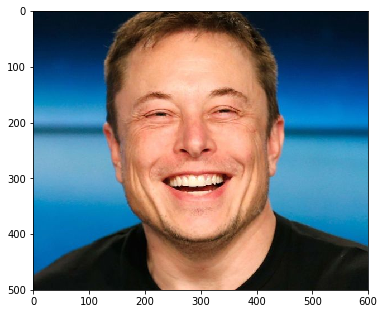

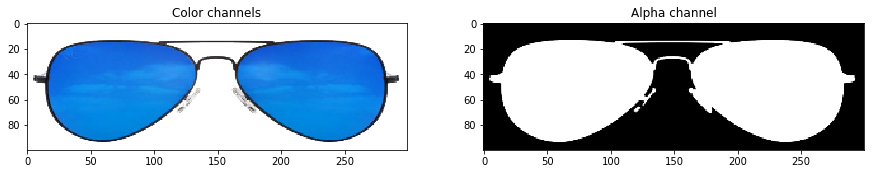

In [9]:
# Load the face image
faceImagePath="musk.jpg"
faceImage=cv2.imread(faceImagePath)
# Make a copy
faceImageBitwise=faceImage.copy()

# Show the face image
plt.imshow(faceImage[:,:,::-1])

# Load the sunglass image with alpha channel
sunglassImagePath="sunglass.png"
glassPNG=cv2.imread(sunglassImagePath,-1)
# Resize the image to fit over eye region
glassPNG=cv2.resize(glassPNG,(300,100))
print("Image Dimension={}",format(glassPNG.shape))

# Separate the color and alpha channels
glassColor=glassPNG[:,:,0:3]
glassMask1=glassPNG[:,:,3]

# Display the images for clarity
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassColor[:,:,::-1]);plt.title('Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Alpha channel');

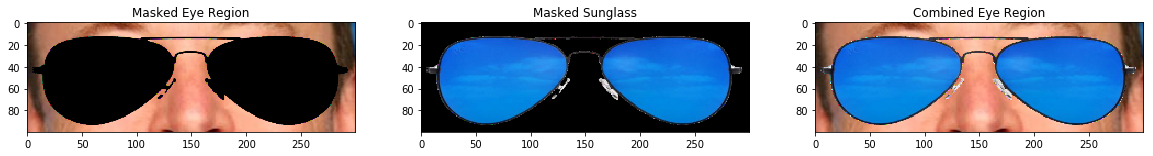

In [14]:
# Get the eye ROI
eyeROI=faceImageBitwise[150:250,140:440]

# Make the dimensions of the mask same as the input image.
# Since Face Image is a 3-channel image, we create a 3 channel image for the mask
glassMask=cv2.merge((glassMask1,glassMask1,glassMask1))

# Make holes in the eye ROI and merge it with glassMask to make eye masked region
eye = cv2.bitwise_and(eyeROI,cv2.bitwise_not(glassMask))

# Use the mask to create the masked sunglass region
sunglass = cv2.bitwise_and(glassColor,glassMask)

# Combine the Sunglass in the Eye Region to get the augmented image
eyeRoiFinal = cv2.bitwise_or(eye, sunglass)

# Display the intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(eye[:,:,::-1]);plt.title("Masked Eye Region");
plt.subplot(132);plt.imshow(sunglass[:,:,::-1]);plt.title("Masked Sunglass");
plt.subplot(133);plt.imshow(eyeRoiFinal[:,:,::-1]);plt.title("Combined Eye Region");

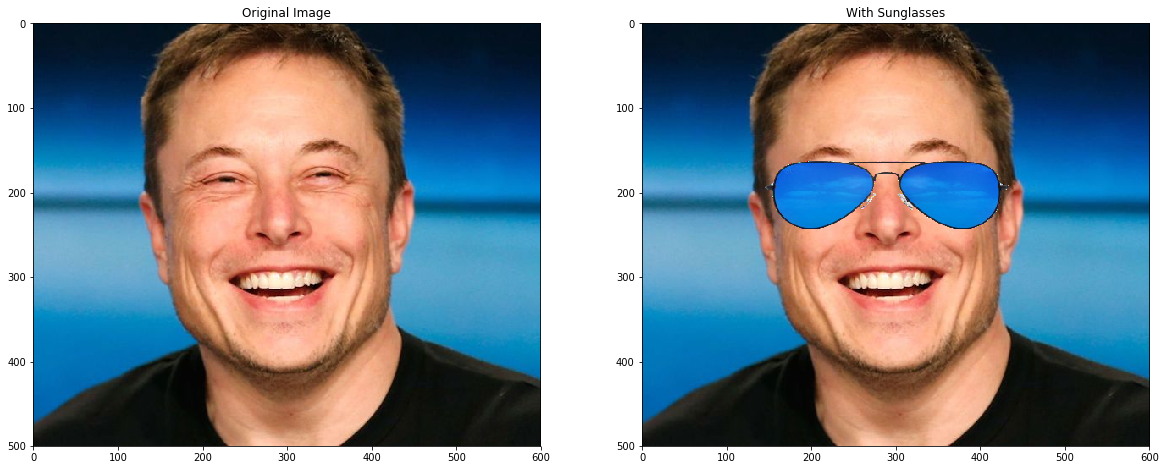

In [17]:
# Replace the eye ROI with the output from the previous section
faceImageBitwise[150:250,140:440]=eyeRoiFinal

# Display the final result
plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceImageBitwise[:,:,::-1]);plt.title("With Sunglasses");